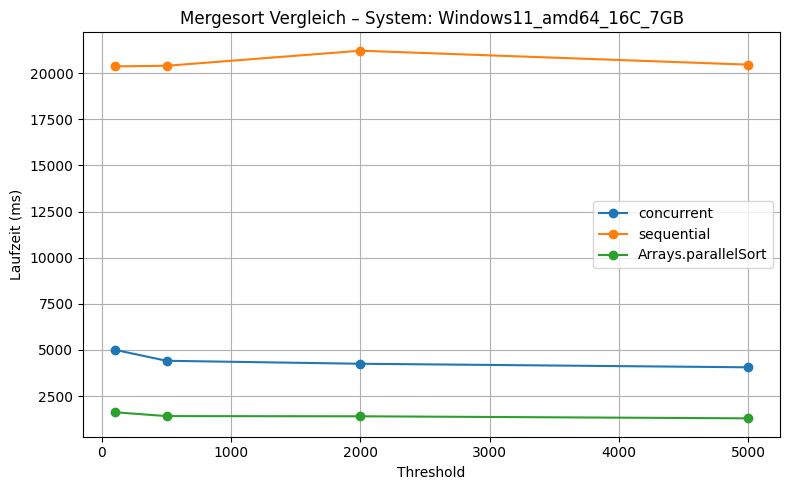

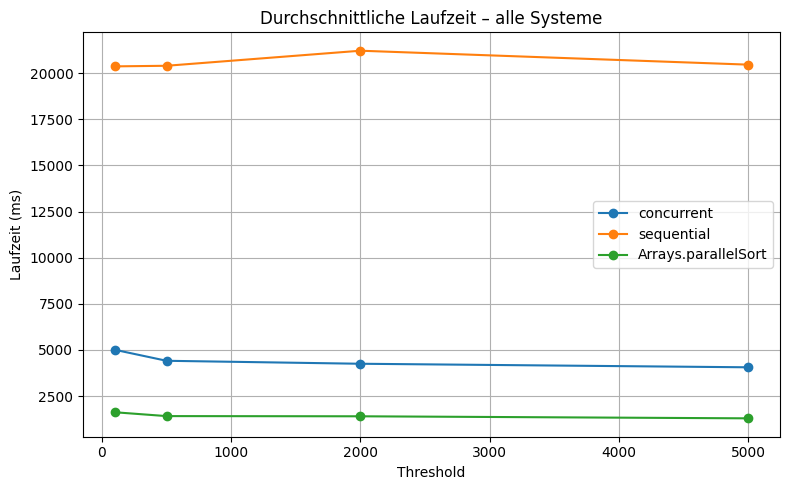

,threshold,time_concurrent_ms,time_sequential_ms,time_parallel_ms,system
0,100,5296,20456,1663,Windows11_amd64_16C_7GB
4,100,4719,20272,1583,Windows11_amd64_16C_7GB
1,500,4462,20226,1353,Windows11_amd64_16C_7GB
5,500,4362,20566,1477,Windows11_amd64_16C_7GB
2,2000,4215,21275,1318,Windows11_amd64_16C_7GB
6,2000,4287,21149,1491,Windows11_amd64_16C_7GB
3,5000,4295,20785,1250,Windows11_amd64_16C_7GB
7,5000,3823,20129,1337,Windows11_amd64_16C_7GB


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob
import re

# Pfad zu den Mergesort-Messungen
data_dir = "../docs/measurements/N4/A1/"
csv_files = glob(os.path.join(data_dir, "N4_run_*.csv"))

all_data = []

for file in csv_files:
    match = re.search(r"N4_run_(.*?)_\d+\.csv", os.path.basename(file))
    if not match:
        continue
    system = match.group(1)

    try:
        df = pd.read_csv(file)
        if df.empty or not {"threshold", "time_concurrent_ms", "time_sequential_ms", "time_parallel_ms"}.issubset(df.columns):
            continue
        df["system"] = system
        all_data.append(df)
    except Exception as e:
        print(f"Fehler beim Lesen: {file} – {e}")
        continue

if not all_data:
    print("Keine gültigen CSV-Dateien gefunden.")
else:
    df_all = pd.concat(all_data, ignore_index=True)

    # Durchschnittswerte pro System und Threshold
    df_avg = df_all.groupby(["system", "threshold"], as_index=False).mean()

    # Diagramm: Zeitvergleich je Threshold pro System
    for system in df_avg["system"].unique():
        df_sys = df_avg[df_avg["system"] == system]

        plt.figure(figsize=(8, 5))
        plt.plot(df_sys["threshold"], df_sys["time_concurrent_ms"], marker="o", label="concurrent")
        plt.plot(df_sys["threshold"], df_sys["time_sequential_ms"], marker="o", label="sequential")
        plt.plot(df_sys["threshold"], df_sys["time_parallel_ms"], marker="o", label="Arrays.parallelSort")

        plt.title(f"Mergesort Vergleich – System: {system}")
        plt.xlabel("Threshold")
        plt.ylabel("Laufzeit (ms)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Globale Mittelwerte (optional)
    df_global_avg = df_all.groupby("threshold", as_index=False)[["time_concurrent_ms", "time_sequential_ms", "time_parallel_ms"]].mean()

    plt.figure(figsize=(8, 5))
    plt.plot(df_global_avg["threshold"], df_global_avg["time_concurrent_ms"], marker="o", label="concurrent")
    plt.plot(df_global_avg["threshold"], df_global_avg["time_sequential_ms"], marker="o", label="sequential")
    plt.plot(df_global_avg["threshold"], df_global_avg["time_parallel_ms"], marker="o", label="Arrays.parallelSort")
    plt.title("Durchschnittliche Laufzeit – alle Systeme")
    plt.xlabel("Threshold")
    plt.ylabel("Laufzeit (ms)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Daten anzeigen
    display(df_all.sort_values(by=["system", "threshold"]))


🔹 Globaler Mittelwert aller Algorithmen:
               algorithm  time_ms
0   java_dualpivot_sort   5664.0
1    parallel_quicksort   1705.6
2  quick_insertion_sort  11007.0
3   recursive_quicksort  11291.0


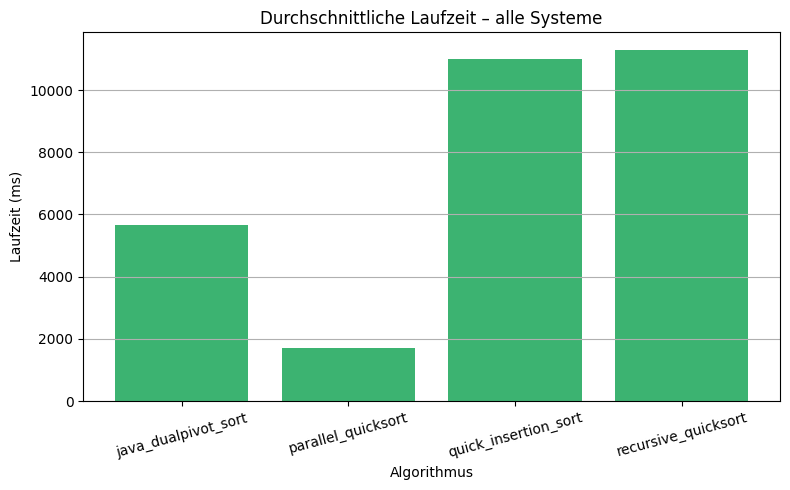

🔹 Mittelwert je System:
                     system             algorithm  time_ms
0  Windows11_amd64_16C_7GB   java_dualpivot_sort   5664.0
1  Windows11_amd64_16C_7GB    parallel_quicksort   1705.6
2  Windows11_amd64_16C_7GB  quick_insertion_sort  11007.0
3  Windows11_amd64_16C_7GB   recursive_quicksort  11291.0


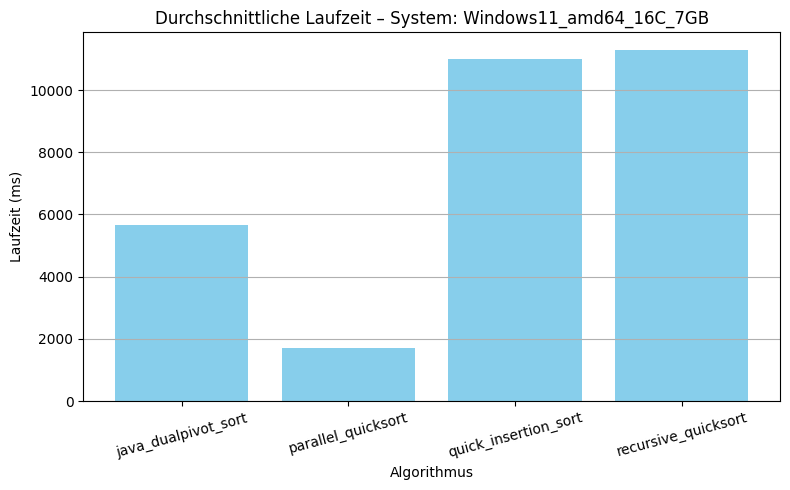

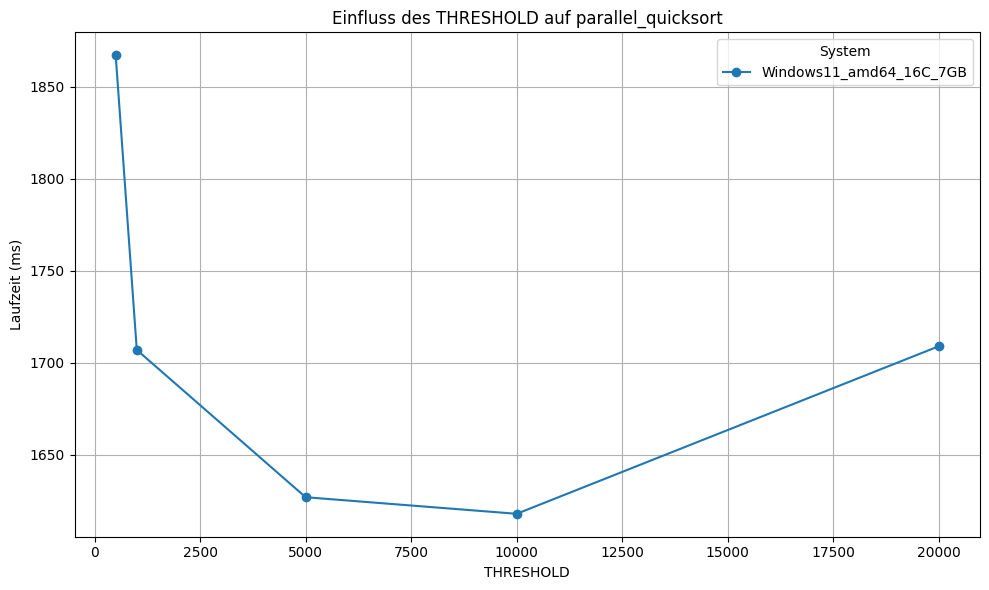

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from glob import glob

data_dir = "../docs/measurements/N4/A2/"
csv_files = glob(os.path.join(data_dir, "N4_qs_*.csv"))

all_data = []

for file in csv_files:
    match = re.search(r"N4_qs_(.*?)_\d+\.csv", os.path.basename(file))
    if not match:
        continue
    system = match.group(1)

    try:
        df = pd.read_csv(file)
        if df.empty or not {"algorithm", "time_ms", "threshold"}.issubset(df.columns):
            print(f"⚠️ Datei übersprungen (leer oder ungültig): {file}")
            continue
        df["system"] = system
        all_data.append(df)
    except Exception as e:
        print(f"⚠️ Fehler beim Einlesen von {file}: {e}")
        continue

if not all_data:
    print("❌ Keine gültigen CSV-Dateien gefunden.")
else:
    df_all = pd.concat(all_data, ignore_index=True)

    df_parallel_mean = (
        df_all[df_all["algorithm"] == "parallel_quicksort"]
        .groupby("system", as_index=False)
        .agg({"time_ms": "mean"})
    )
    df_parallel_mean["algorithm"] = "parallel_quicksort"
    df_parallel_mean["threshold"] = "mean"

    df_fixed = df_all[df_all["threshold"] == -1][["algorithm", "system", "time_ms"]]

    df_compare = pd.concat([df_fixed, df_parallel_mean], ignore_index=True)

    # Globaler Mittelwert
    df_mean_all = df_compare.groupby("algorithm", as_index=False)["time_ms"].mean()
    print("🔹 Globaler Mittelwert aller Algorithmen:\n", df_mean_all)

    # Diagramm – globaler Vergleich
    plt.figure(figsize=(8, 5))
    plt.bar(df_mean_all["algorithm"], df_mean_all["time_ms"], color="mediumseagreen")
    plt.title("Durchschnittliche Laufzeit – alle Systeme")
    plt.ylabel("Laufzeit (ms)")
    plt.xlabel("Algorithmus")
    plt.xticks(rotation=15)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Mittelwert je System
    df_mean_per_system = df_compare.groupby(["system", "algorithm"], as_index=False)["time_ms"].mean()
    print("🔹 Mittelwert je System:\n", df_mean_per_system)

    systems = df_mean_per_system["system"].unique()
    for system in systems:
        df_sys = df_mean_per_system[df_mean_per_system["system"] == system]

        plt.figure(figsize=(8, 5))
        plt.bar(df_sys["algorithm"], df_sys["time_ms"], color="skyblue")
        plt.title(f"Durchschnittliche Laufzeit – System: {system}")
        plt.ylabel("Laufzeit (ms)")
        plt.xlabel("Algorithmus")
        plt.xticks(rotation=15)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

      #Vergleich der verschiedenen THRESHOLD-Werte (nur parallel_quicksort)
    df_thresholds = df_all[df_all["algorithm"] == "parallel_quicksort"]

    if not df_thresholds.empty:
        plt.figure(figsize=(10, 6))
        for system in df_thresholds["system"].unique():
            df_sys = df_thresholds[df_thresholds["system"] == system]
            df_sys_sorted = df_sys.sort_values("threshold")
            plt.plot(df_sys_sorted["threshold"], df_sys_sorted["time_ms"], marker="o", label=system)

        plt.title("Einfluss des THRESHOLD auf parallel_quicksort")
        plt.xlabel("THRESHOLD")
        plt.ylabel("Laufzeit (ms)")
        plt.grid(True)
        plt.legend(title="System")
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Keine Threshold-Messungen für parallel_quicksort gefunden.")    


Fehler beim Einlesen von ../docs/measurements/N4/A3\N4_fibo_Windows11_amd64_16C_7GB_1746356413851.csv: No columns to parse from file
Fehler beim Einlesen von ../docs/measurements/N4/A3\N4_fibo_Windows11_amd64_16C_7GB_1746356488159.csv: No columns to parse from file
Durchschnittliche Laufzeit aller Methoden (alle Systeme):


,method,time_ms
0,iterative,0.00
1,recursive,797.75


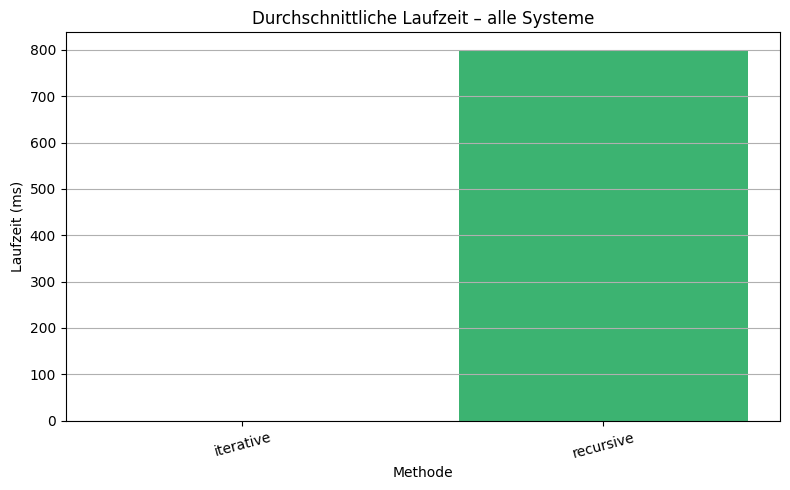

Durchschnittliche Laufzeit je System:


,system,method,time_ms
0,Windows11_amd64_16C_7GB,iterative,0.00
1,Windows11_amd64_16C_7GB,recursive,797.75


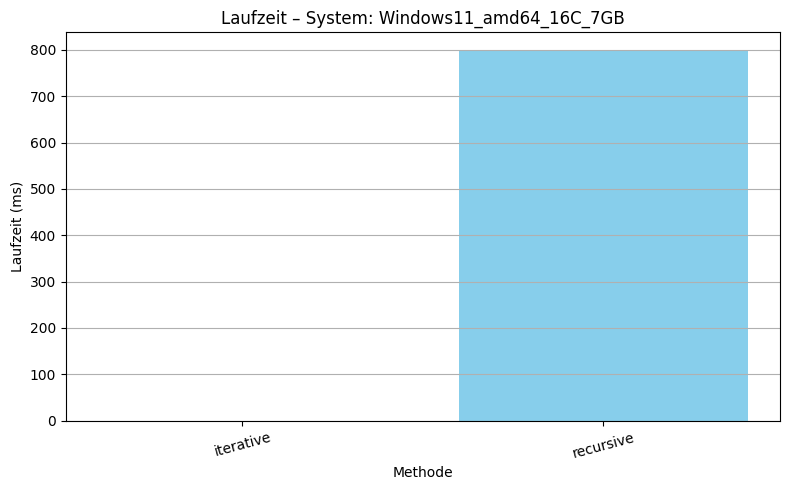

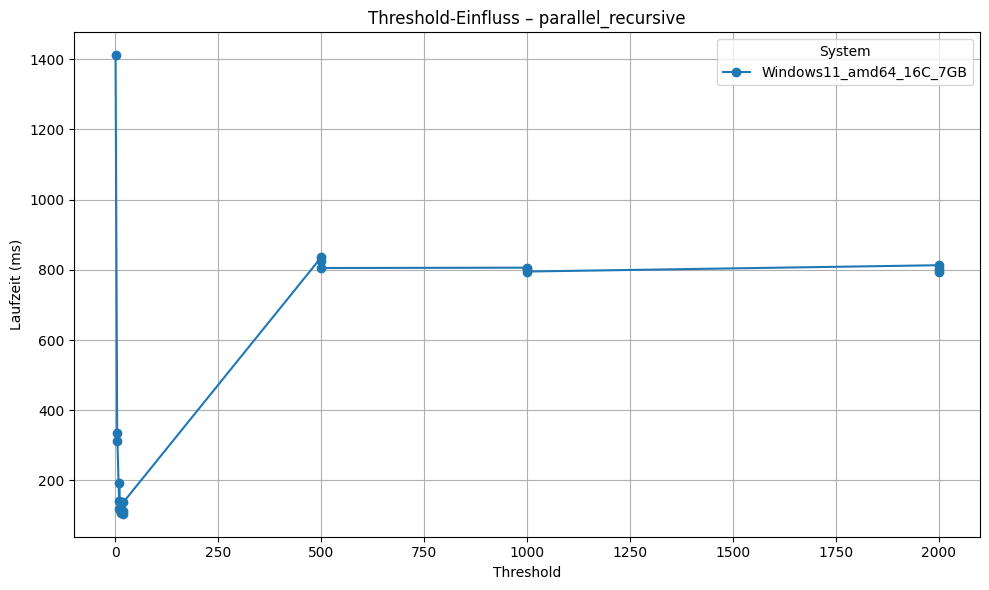

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from glob import glob

# Pfad zu den CSV-Dateien
data_dir = "../docs/measurements/N4/A3/"
csv_files = glob(os.path.join(data_dir, "N4_fibo_*.csv"))

all_data = []

# CSV-Dateien einlesen
for file in csv_files:
    match = re.search(r"N4_fibo_(.*?)_\d+\.csv", os.path.basename(file))
    if not match:
        continue
    system = match.group(1)

    try:
        df = pd.read_csv(file)
        if df.empty or not {"method", "threshold", "time_ms"}.issubset(df.columns):
            print(f"Datei übersprungen (ungültig): {file}")
            continue
        df["system"] = system
        all_data.append(df)
    except Exception as e:
        print(f"Fehler beim Einlesen von {file}: {e}")
        continue

# Auswertung starten, wenn Daten vorhanden
if not all_data:
    print("Keine gültigen CSV-Dateien gefunden.")
else:
    df_all = pd.concat(all_data, ignore_index=True)

    # Durchschnittliche Laufzeit je Methode (threshold == -1)
    df_avg_methods = (
        df_all[df_all["threshold"] == -1]
        .groupby("method", as_index=False)["time_ms"]
        .mean()
    )
    print("Durchschnittliche Laufzeit aller Methoden (alle Systeme):")
    display(df_avg_methods)

    # Diagramm: globaler Vergleich
    plt.figure(figsize=(8, 5))
    plt.bar(df_avg_methods["method"], df_avg_methods["time_ms"], color="mediumseagreen")
    plt.title("Durchschnittliche Laufzeit – alle Systeme")
    plt.ylabel("Laufzeit (ms)")
    plt.xlabel("Methode")
    plt.grid(axis='y')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()

    # Durchschnitt je System (nur feste Methoden)
    df_avg_per_system = (
        df_all[df_all["threshold"] == -1]
        .groupby(["system", "method"], as_index=False)["time_ms"]
        .mean()
    )
    print("Durchschnittliche Laufzeit je System:")
    display(df_avg_per_system)

    systems = df_avg_per_system["system"].unique()
    for system in systems:
        df_sys = df_avg_per_system[df_avg_per_system["system"] == system]
        plt.figure(figsize=(8, 5))
        plt.bar(df_sys["method"], df_sys["time_ms"], color="skyblue")
        plt.title(f"Laufzeit – System: {system}")
        plt.ylabel("Laufzeit (ms)")
        plt.xlabel("Methode")
        plt.xticks(rotation=15)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

    # Threshold-Vergleich für parallel_recursive
    df_thresholds = df_all[df_all["method"] == "parallel_recursive"]

    if not df_thresholds.empty:
        plt.figure(figsize=(10, 6))
        for system in df_thresholds["system"].unique():
            df_sys = df_thresholds[df_thresholds["system"] == system]
            df_sys_sorted = df_sys.sort_values("threshold")
            plt.plot(df_sys_sorted["threshold"], df_sys_sorted["time_ms"],
                     marker="o", label=system)

        plt.title("Threshold-Einfluss – parallel_recursive")
        plt.xlabel("Threshold")
        plt.ylabel("Laufzeit (ms)")
        plt.grid(True)
        plt.legend(title="System")
        plt.tight_layout()
        plt.show()
    else:
        print("Keine threshold-basierten Daten für parallel_recursive gefunden.")



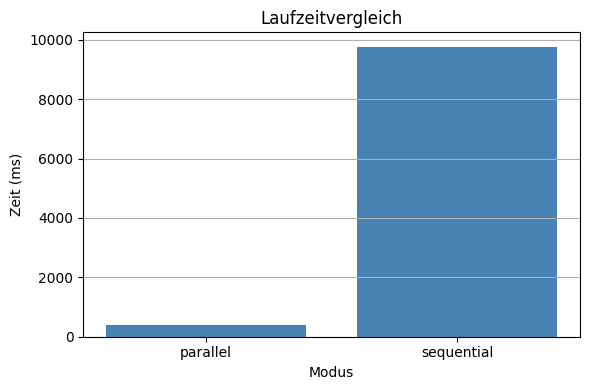

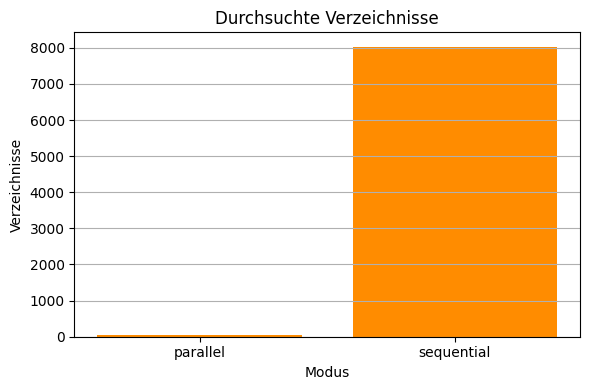

,mode,time_ms,found,dirs_visited,root,file
0,parallel,394,True,36,C:\Users\Erin,N4_findfile_result.csv
1,sequential,9766,True,8026,C:\Users\Erin,N4_findfile_result.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob

# Pfad zu den Messdateien
data_dir = "../docs/measurements/N4/A4/"
csv_files = glob(os.path.join(data_dir, "N4_findfile_*.csv"))

all_data = []

# Alle CSV-Dateien einlesen
for file in csv_files:
    try:
        df = pd.read_csv(file)
        if df.empty or not {"mode", "time_ms", "found", "dirs_visited", "root"}.issubset(df.columns):
            continue
        df["file"] = os.path.basename(file)
        all_data.append(df)
    except Exception:
        continue

if not all_data:
    print("Keine gültigen CSV-Dateien gefunden.")
else:
    df_all = pd.concat(all_data, ignore_index=True)

    # Mittelwerte nach Modus
    df_mean = df_all.groupby("mode", as_index=False)[["time_ms", "dirs_visited"]].mean()

    # Vergleich: Zeit
    plt.figure(figsize=(6, 4))
    plt.bar(df_mean["mode"], df_mean["time_ms"], color="steelblue")
    plt.title("Laufzeitvergleich")
    plt.ylabel("Zeit (ms)")
    plt.xlabel("Modus")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Vergleich: Anzahl durchsuchter Verzeichnisse
    plt.figure(figsize=(6, 4))
    plt.bar(df_mean["mode"], df_mean["dirs_visited"], color="darkorange")
    plt.title("Durchsuchte Verzeichnisse")
    plt.ylabel("Verzeichnisse")
    plt.xlabel("Modus")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Anzeige der Gesamtdaten
    display(df_all.sort_values(by="time_ms"))
